# Corporate takeovers in Africa (2016-2021)

This is confidential data. The data is a list of all the mergers and acquisitions announced in Africa over a period of time (2016-2021). There is no quantitative data. The information is a listing containing the names of the target and aquiror companies, their sectors and nation of domicile. The analysis is done by grouping the categories and counting line numbers. There are some interesting insights that would be of benefit to researchers and decision makers, whether in government or the private sector.

This notebook is written in R. The libraries used are loaded first.

In [1]:
library(tidyverse);
library(Rgraphviz)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: graph

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:b

Then the data is loaded.

In [2]:
data <- readxl::read_xls("resources/data.xls");data

DateAnnounced,DateEffective,Target.nam,Target.nat,Target.sector,Target,Target.desc,Acquiror.nam,Acquiror.nat,Acquiror.sec,⋯,Target Macro Industry,Acquiror Macro Industry,Investor,Investor Immediate Parent Name,Investor Ultimate Parent Name,Seller Immediate Parent Name,Seller Ultimate Parent Name,Acquisition Technique,Form,Master Deal Type
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-04-27,44313,Dragonfly Aerospace,South Africa,Telecommunications Equipment,-,"Dragonfly Aerospace is a manufacturer of wireless communications equipment. The company design and build compact high-performance imaging payloads and satellites. The Company is located in Stellenbosch, South Africa.",Max Polyakov,Ukraine,Other Financials,⋯,Telecommunications,Financials,-,-,-,-,-,Not Applicable,Acq. of Assets,IMA
2021-04-20,-,Adapt IT Holdings Ltd,South Africa,IT Consulting & Services,-,"Adapt IT Holdings Ltd is a provider of computer systems design services. The Company's principal activity is providing software development solutions using Oracle and Java technology. It focuses on internet solution environment, utilizing a variety of development tools and techniques to deliver web-based solutions providing clients with internet connectivity and internet-related software products. The Company's core skills are focused on Oracle Designer, Developer and Database technology, including Java/J2EE and Headstart. Its software product brands are Tranquility, Canelab, DevMan, ApplyIT, IntelliPERMIT, FlexiLOG, SmartSURE and OptiRUN. The Company was founded in 1996 and is located in Midrand, South Africa.",Blacksheep Master Fund Ltd,Cayman Islands,Other Financials,⋯,High Technology,Financials,-,-,-,-,-,Not Applicable,Acq. Maj. Int.,IMA
2021-04-19,-,Millicom Tanzania Ltd,Tanzania,Wireless,-,"Millicom Tanzania Ltd, located in Dar es Salaam, Tanzania, provides wireless telecommunications services. It provides prepaid cellular services in 13 markets in Africa and Latin America. It has more than 30 million customers. The Company was founded in 1994.",Axian Group,Madagascar,Other Financials,⋯,Telecommunications,Financials,-,-,-,-,-,Divestiture,Acq. of Assets,IMA
2021-04-08,44294,Paymob,Egypt,Software,-,"Paymob is an Egypt-based digital payment provider. It's products include online payment, Point of Sale (POS) solutions and Payment links. The Company was founded in 2015 and is located in Egypt.",Investor Group,Mexico,Other Financials,⋯,High Technology,Financials,FMO Global Ventures LLC A15,FMO Global Ventures LLC Accelero Capital Holdings Sarl,FMO Global Ventures LLC Accelero Capital Holdings Sarl,-,-,Acquiror is an Investor Group Financial Acquiror,Acq. Maj. Int.,IMA
2021-04-07,-,Adapt IT Holdings Ltd,South Africa,IT Consulting & Services,-,"Adapt IT Holdings Ltd is a provider of computer systems design services. The Company's principal activity is providing software development solutions using Oracle and Java technology. It focuses on internet solution environment, utilizing a variety of development tools and techniques to deliver web-based solutions providing clients with internet connectivity and internet-related software products. The Company's core skills are focused on Oracle Designer, Developer and Database technology, including Java/J2EE and Headstart. Its software product brands are Tranquility, Canelab, DevMan, ApplyIT, IntelliPERMIT, FlexiLOG, SmartSURE and OptiRUN. The Company was founded in 1996 and is located in Midrand, South Africa.",Volaris Group Inc,Canada,Other Financials,⋯,High Technology,Financials,-,-,-,-,-,Scheme of Arrangement,Acq. Maj. Int.,IMA
2021-04-01,-,Airtel Africa Plc-Mobile,South Africa,Telecommunications Services,-,"Mobile money business of Airtel Africa Plc, located in South Africa.",Mastercard Inc,United States,Other Financials,⋯,Telecommunications,Financials,-,-,-,-,-,Privately Negotiated Purchase,Acq. Part. Int.,IMA
2021-03-29,44284,Weelo LLC,Egypt,Soft

The relevant columns are selected and extracted into a tibble (a table) named "takeover".

In [3]:
takeovers <- data %>% 
    select(dt=DateAnnounced,
           t.nam=Target.nam, 
           a.nam=Acquiror.nam, 
           t.sec=Target.sector,
           a.sec=Acquiror.sec, 
           t.nat=Target.nat, 
           a.nat=Acquiror.nat);
takeovers

dt,t.nam,a.nam,t.sec,a.sec,t.nat,a.nat
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-04-27,Dragonfly Aerospace,Max Polyakov,Telecommunications Equipment,Other Financials,South Africa,Ukraine
2021-04-20,Adapt IT Holdings Ltd,Blacksheep Master Fund Ltd,IT Consulting & Services,Other Financials,South Africa,Cayman Islands
2021-04-19,Millicom Tanzania Ltd,Axian Group,Wireless,Other Financials,Tanzania,Madagascar
2021-04-08,Paymob,Investor Group,Software,Other Financials,Egypt,Mexico
2021-04-07,Adapt IT Holdings Ltd,Volaris Group Inc,IT Consulting & Services,Other Financials,South Africa,Canada
2021-04-01,Airtel Africa Plc-Mobile,Mastercard Inc,Telecommunications Services,Other Financials,South Africa,United States
2021-03-29,Weelo LLC,Investor Group,Software,Other Financials,Egypt,United States
2021-03-23,Airtel Tchad SA,Helios Towers PLC,Other Telecom,Telecommunications Services,Chad,United Kingdom
2021-03-23,Selpal (Pty) Ltd,First National Bank Corp,IT Consulting & Services,Banks,South Africa,United States


Other than white space around entries (which should be cleaned up), the data looks fine.

To start with the analysis, look at the per nation acquisitions in Africa. Only nations with 3 or more takeovers are considered.

In [4]:
group.a.nat  <-  takeovers %>% group_by(a.nat) %>% summarise(n=n());
group.a.nat  <- group.a.nat[order(group.a.nat$n,decreasing=TRUE),] %>% filter(n>2)
names(group.a.nat) <- c("Acquiror nation", "Count")
group.a.nat
names(group.a.nat) <- c("a.nat", "n")


Acquiror nation,Count
<chr>,<int>
United States,40
South Africa,35
United Kingdom,31
France,19
Mauritius,13
Morocco,7
Namibia,6
Netherlands,6
Switzerland,5


Seeing this it is apparent that the US (40), UK (31) and France (19) are the 3 nations outside of Africa  heavily involved in takeovers of African companies. Other major takeover nations within Africa are Mauritius (13) and South Africa (35). 
*Possible reasons*
Until recently South Africa's economy was the largest in Africa, so their takeover tally might be expected. Mauritius has drawn much invest in recent years due to its very favourable tax laws. It could be that expatriated companies are becoming involved in takeovers of African companies to domicile themselves in Mauritius.
The large number of takeovers from US, UK and France may reflect the history between nations and also the value being offered by African countries over the last 5 years.

Looking at the target nations: (only nations with 3 or more takeovers are listed)

In [5]:
group.t.nat  <-  takeovers %>% group_by(t.nat) %>% summarise(n=n());
group.t.nat  <- group.t.nat[order(group.t.nat$n,decreasing=TRUE),] %>% filter(n>2)
names(group.t.nat) <- c("Target nation", "Count")
group.t.nat
names(group.t.nat) <- c("t.nat", "n")


Target nation,Count
<chr>,<int>
South Africa,79
Egypt,29
Nigeria,22
Kenya,21
Mauritius,9
Tanzania,8
Morocco,7
Namibia,7
Ghana,5


Here, one can see that there are four major countries in Africa facing the lion share of corporate takeovers.
The nations are SA, Nigeria, Egypt and Kenya. Between them South Africa has nearly 3 times the number of takeovers as the second highest contender, Egypt and it takes the 2nd (Egypt),3rd (Nigeria) and 4th (Kenya) contenders to match the number of takeovers in South Africa. This seems to reflect a case of distress amongst companies in South Africa, that there should be so many targeted companies for takeover.

Now, look at the country specific relation between acquiror and target nations. Only nations with 3 or more takeovers are listed.

In [6]:
group.t.nat.a.nat <- takeovers %>% group_by(a.nat,t.nat) %>% summarise(n=n());
group.t.nat.a.nat <- group.t.nat.a.nat[order(group.t.nat.a.nat$n,decreasing = TRUE),] %>% filter(n>2) 
names(group.t.nat.a.nat) <- c("Acquiror nation","Target nation","Tally");group.t.nat.a.nat
names(group.t.nat.a.nat) <- c("a.nat","t.nat","n")

`summarise()` has grouped output by 'a.nat'. You can override using the `.groups` argument.



Acquiror nation,Target nation,Tally
<chr>,<chr>,<int>
United States,South Africa,17
South Africa,South Africa,14
United Kingdom,South Africa,11
United States,Kenya,7
Mauritius,South Africa,6
United States,Egypt,6
France,South Africa,5
Namibia,Namibia,5
South Africa,Kenya,5


*Acquirors*

In [7]:
acquirors <- levels(as.factor(group.t.nat.a.nat$a.nat));acquirors

[1] "Australia"      "Canada"         "Egypt"          "France"        
 [5] "Germany"        "Hong Kong"      "Mauritius"      "Morocco"       
 [9] "Namibia"        "South Africa"   "United Kingdom" "United States" 
[13] "Utd Arab Em"

*Targets*

In [8]:
targets <- levels(as.factor(group.t.nat.a.nat$t.nat));targets

[1] "Egypt"        "Kenya"        "Mauritius"    "Morocco"      "Namibia"     
[6] "Nigeria"      "South Africa" "Tanzania"     "Tunisia"

Now these relationships can be plotted with a directed graph.

In [9]:
reg <- ftM2graphNEL(ft = as.matrix(group.t.nat.a.nat[,-3]), edgemode="directed")

The edges of the graph can be numbered, although formatting needs to be worked on because the numbers are too small to see in the graph.

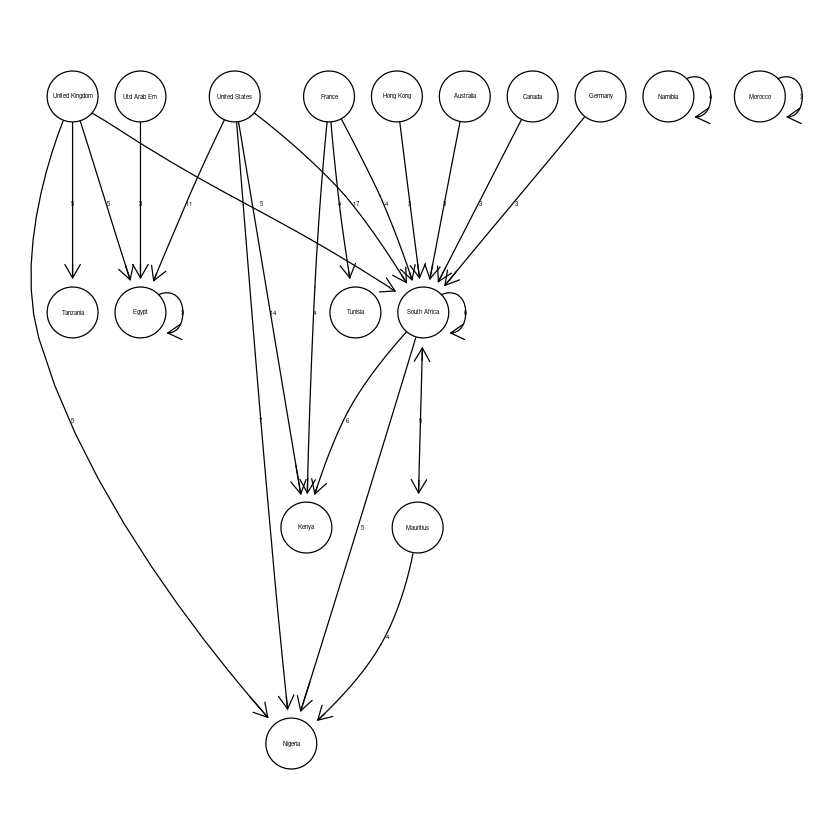

In [10]:
ew <- as.character(group.t.nat.a.nat$n)
names(ew) <- edgeNames(reg)
#edgeNames(reg)
eAttrs <- list()
eAttrs$label <- ew
plot(reg,edgeAttrs=eAttrs)

Due to time constraints on the author the analysis will end here.